In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

## Problem 1


In [2]:
# defining the function for Box-Muller transformation
def BoxMuller(n):
    """
    n = number of samples
    """
    u=np.random.uniform(0,1,n)
    v=np.random.uniform(0,1,n)
    x=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    y=np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    return np.array([x,y])

# genralizing the function for Box-Muller transformation
def BoxMuller_general(n,mu,sigma):
    """
    n = number of samples
    mu = mean
    sigma = standard deviation
    """
    u=np.random.uniform(0,1,n)
    v=np.random.uniform(0,1,n)
    x=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    y=np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    return np.array([x,y])*sigma+mu

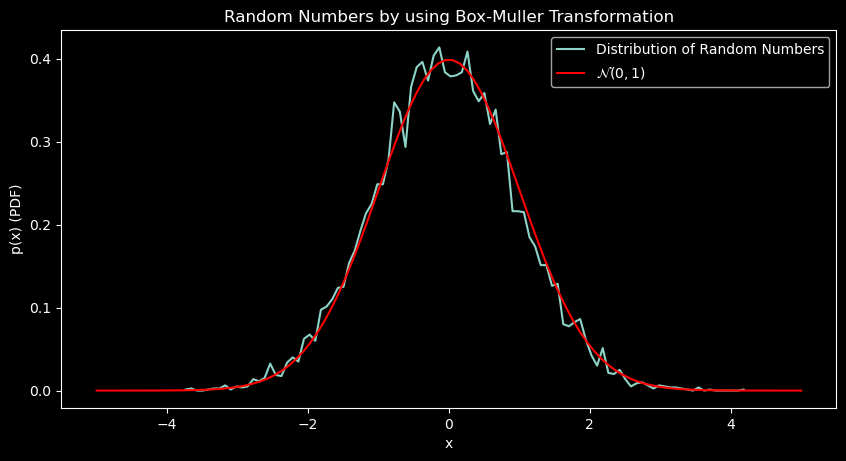

In [4]:
# generating N samples using Box-Muller transformation
N=10000
x,y=BoxMuller(N)
# computing the histrogram and storing it in a variable
hist,bins=np.histogram(x,bins=100, density=True)
# the density is calulated by the formula: hist/N*(bins[1]-bins[0])

# plotting the histogram
plt.figure(figsize=(10,5), dpi=100)
plt.plot(bins[:-1],hist,label='Distribution of Random Numbers')

#plotting a normal distribution with mean 0 and standard deviation 1
x=np.linspace(-5,5,100)
plt.plot(x,norm.pdf(x,0,1), color='red', label='$\\mathcal{N}(0,1)$')

plt.xlabel('x')
plt.ylabel('p(x) (PDF)')
plt.legend(loc='best')
plt.title("Random Numbers by using Box-Muller Transformation")

plt.savefig("Problem1_1.jpg", bbox_inches='tight', dpi=200)

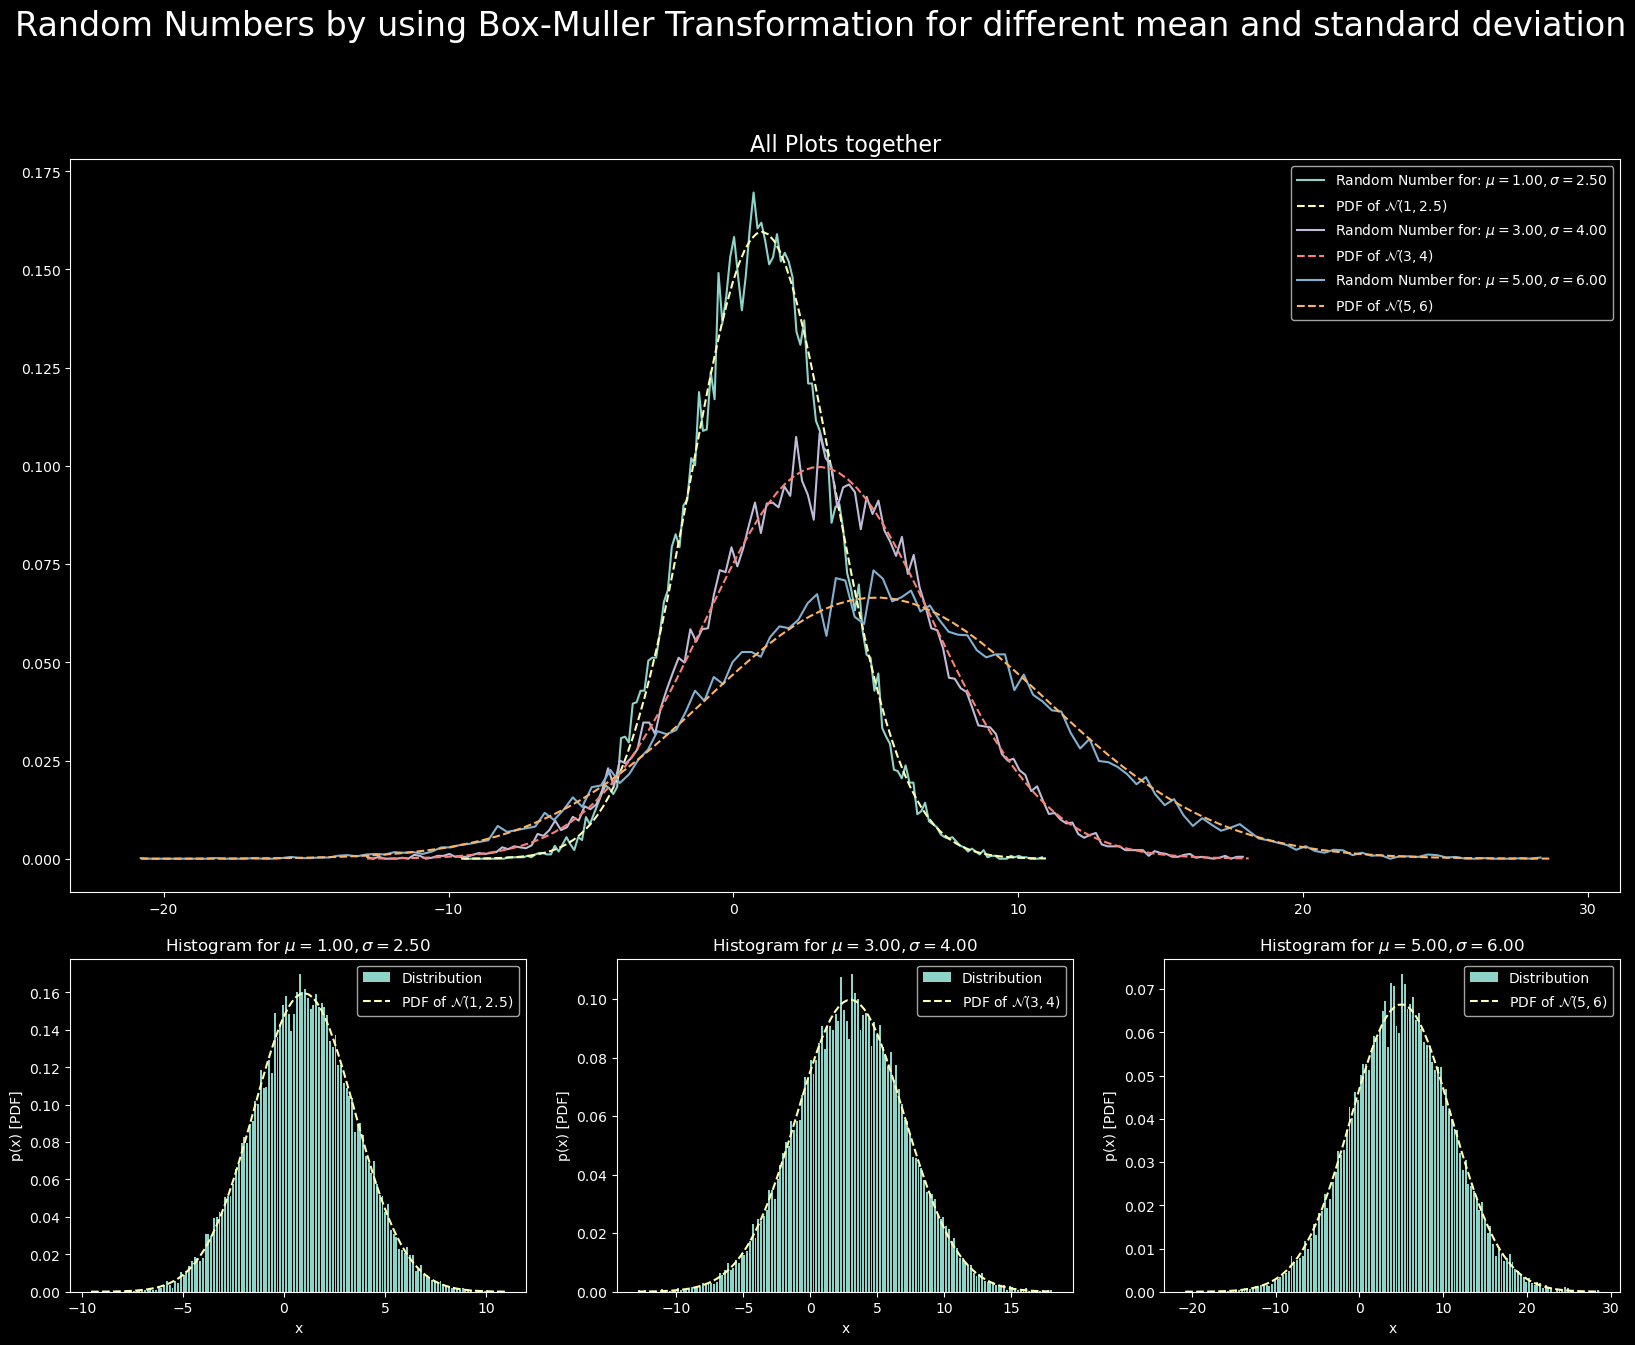

In [5]:
# repeating the above process for different mean and standard deviation
mu = [1,3,5]
sigma = [2.5,4,6]

# number of samples
N = 20000
fig = plt.figure(figsize=(20,15), dpi=100)
grid = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2)
# slecting grids for individual plots
ax1 = fig.add_subplot(grid[2, 0])
ax2 = fig.add_subplot(grid[2, 1])
ax3 = fig.add_subplot(grid[2, 2])
# selecting grid for x-z plot
ax4 = fig.add_subplot(grid[0:2,:])

ax = [ax1,ax2,ax3]

for i in range(len(mu)):
    x,y=BoxMuller_general(N,mu[i],sigma[i])
    #getting the individual histograms
    hist,bins=np.histogram(x,bins=150, density=True)

    #plotting the histogram
    ax[i].hist(x,bins=150, density=True, rwidth = 0.7, label='Distribution')
    ax4.plot(bins[:-1],hist,label='Random Number for: $\\mu=%2.2f, \\sigma=%2.2f$'%(mu[i],sigma[i]))

    #plotting the corresponding normal distribution
    x=np.linspace(min(x),max(x),100)
    ax[i].plot(x,norm.pdf(x,mu[i],sigma[i]),ls='--',lw=1.5, label='PDF of $\\mathcal{N}('+str(mu[i])+','+str(sigma[i])+')$')
    ax4.plot(x,norm.pdf(x,mu[i],sigma[i]),ls='--',lw=1.5, label='PDF of $\\mathcal{N}('+str(mu[i])+','+str(sigma[i])+')$')

    #formatting the plots
    ax[i].legend(loc='best')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('p(x) [PDF]')
    ax[i].set_title('Histogram for $\\mu=%2.2f, \\sigma=%2.2f$'%(mu[i],sigma[i]), fontsize=12)

ax4.legend(loc='best')
ax4.set_title('All Plots together', fontsize=16)
plt.suptitle("Random Numbers by using Box-Muller Transformation for different mean and standard deviation", fontsize=24);

plt.savefig("Problem1_2.jpg", bbox_inches='tight', dpi=200)

## Problem 2


In [2]:
# defining function for unbiased random walk with equal probability
def random_walk(n, x0):
    """
    Returns the final postion on 1D lattice staring from x0
    p: probability of hopping to right = 0.5
    q: probabillity of hopping to left = 0.5

    prameters
    ========================================
    n: number of steps
    x0: initial position
    """
    x = x0
    r = np.random.random(n)
    # for i in range(n):
        # if r[i] < 0.5:
            # x += 1
        # else:
            # x -= 1
    
    P = len(np.where(r < 0.5)[0])
    Q = len(np.where(r >= 0.5)[0])
    x = x + (P-Q)
    return x

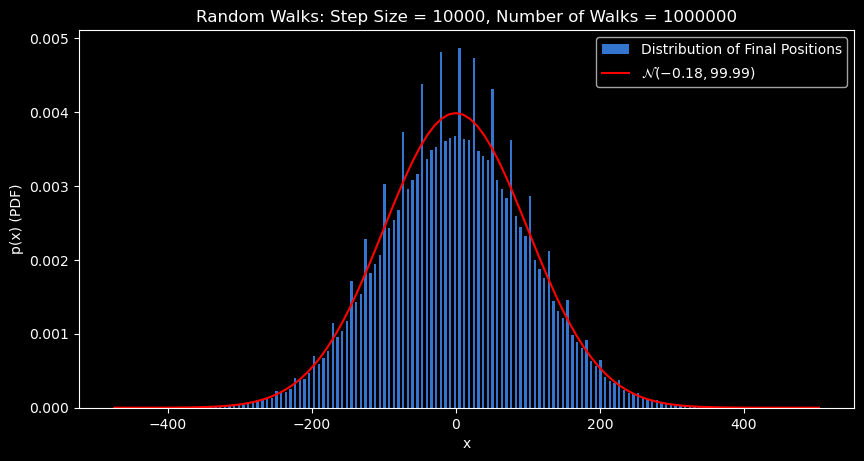

In [5]:
# storing the final positions of random walks in a variable

# number of random walks
M = 1000000
# number of steps
N = 10000
# initial position
x0 = 0

x = np.zeros(M)
for i in range(M):
    x[i] = random_walk(N,x0)

plt.figure(figsize=(10,5), dpi=100)
plt.hist(x,bins=150,density=True,color='#3475D0', rwidth = 0.5,label='Distribution of Final Positions');

# calulating mu and sigma of random walks
mu = np.mean(x)
sigma = np.std(x)

x=np.linspace(min(x),max(x),100)
plt.plot(x,norm.pdf(x,mu,sigma),color='red',label='$\\mathcal{N}(%2.2f, %2.2f)$'%(mu,sigma))
plt.xlabel('x')
plt.ylabel('p(x) (PDF)')
plt.legend(loc='best')
plt.title("Random Walks: Step Size = %d, Number of Walks = %d"%(N,M));

#plt.savefig("Problem2_1.jpg", bbox_inches='tight', dpi=200)

In [8]:
# plotting std deviation of distribution for different number of steps
N = np.linspace(10,100000,100+1)
std = np.zeros(len(N))

# number of random walks
M = 1000
for i in range(len(N)):
    x = np.zeros(M)
    for j in range(M):
        x[j] = random_walk(int(N[i]),0)
    std[i] = np.std(x)


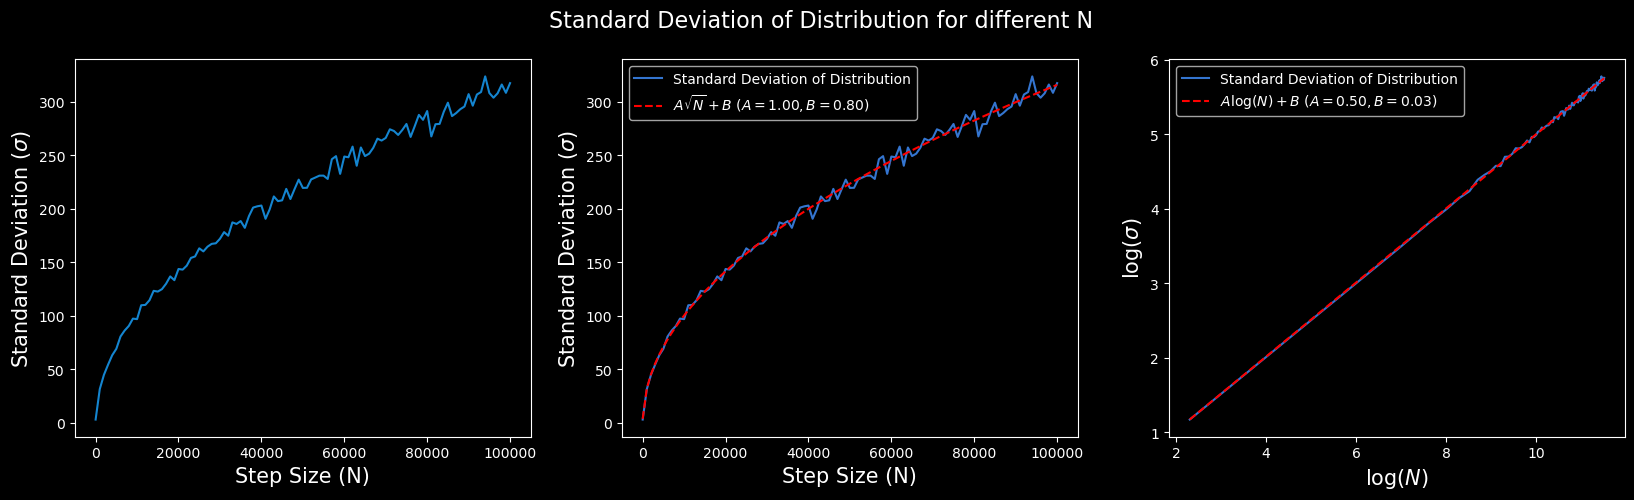

In [16]:
# fitting the STD to square root function
def fit(x,a,b):
    return a*np.sqrt(x)+b
def fit_log(x,a,b):
    return a*(x)+b

# fitting the standard deviation 
popt, pcov = curve_fit(fit, N, std)
popt1, pcov1 = curve_fit(fit_log, np.log(N), np.log(std))

# plotting the data and the fitted function
fig, ax = plt.subplots(1,3, figsize=(20,5), dpi=100)

#plotting the data in the first subplot
ax[0].plot(N,std,color='#1485D0',label='Standard Deviation of Distribution')

#plotting the fitted function in the second subplot
ax[1].plot(N,std,color='#3475D0',label='Standard Deviation of Distribution')
ax[1].plot(N,fit(N,*popt),ls='--', color='red',label='$A\sqrt{N}+B~ (A=%2.2f, B=%2.2f)$'%(popt[0],popt[1]))
ax[1].legend(loc='best')

#plotting the fitted function in the third subplot
ax[2].plot(np.log(N), np.log(std),color='#3475D0',label='Standard Deviation of Distribution')
ax[2].plot(np.log(N),fit_log(np.log(N),*popt1),ls='--', color='red',label='$A\log(N)+B~ (A=%2.2f, B=%2.2f)$'%(popt1[0],popt1[1]))
ax[2].legend(loc='best')

for i in range(2):
    ax[i].set_xlabel('Step Size (N)', fontsize=15)
    ax[i].set_ylabel('Standard Deviation ($\\sigma$)', fontsize=15)
ax[2].set_xlabel('$\\log(N)$',  fontsize=15)
ax[2].set_ylabel('$\\log(\sigma)$', fontsize=15)
    
plt.suptitle('Standard Deviation of Distribution for different N ', fontsize=16)

plt.savefig('STD_vs_N.jpg', bbox_inches='tight', dpi=200)